In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2")

C:\Users\soura\AppData\Local\Temp\ipykernel_18952\1691415715.py:1: DtypeWarning:

Columns (5,7,32,34,62,63,64,77,80,91,93,95,97,115,116,122) have mixed types. Specify dtype option on import or set low_memory=False.



In [29]:
df.head()

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [30]:
df.shape

(181691, 136)

In [31]:
cols_to_keep = [
    "success", "iyear","suicide", "attacktype1", "attacktype1_txt", 
    "targtype1_txt", "targsubtype1_txt", "target1", "natlty1_txt", 
    "gname", "gsubname", "nperps", "weaptype1_txt", 
    "weapsubtype1_txt", "nkill", "nkillus"
]

In [32]:
df_subset = df[cols_to_keep]

In [33]:
df_subset.head()

,success,iyear,suicide,attacktype1,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,gsubname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus
0,1,1970,0,1,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Dominican Republic,MANO-D,NaN,NaN,Unknown,NaN,1.0,NaN
1,1,1970,0,6,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Belgium,23rd of September Communist League,NaN,7.0,Unknown,NaN,0.0,NaN
2,1,1970,0,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,United States,Unknown,NaN,NaN,Unknown,NaN,1.0,NaN
3,1,1970,0,3,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States,Unknown,NaN,NaN,Explosives,Unknown Explosive Type,NaN,NaN
4,1,1970,0,7,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,United States,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN


In [34]:
df2 = df_subset

In [35]:
df2.shape

(181691, 16)

In [36]:
df2.isnull().sum()

success                  0
iyear                    0
suicide                  0
attacktype1              0
attacktype1_txt          0
targtype1_txt            0
targsubtype1_txt     10373
target1                638
natlty1_txt           1559
gname                    0
gsubname            175801
nperps               71115
weaptype1_txt            0
weapsubtype1_txt     20768
nkill                10313
nkillus              64446
dtype: int64

In [37]:
df['success'].value_counts()

success
1    161632
0     20059
Name: count, dtype: int64

Text(0, 0.5, 'No. of attacks')

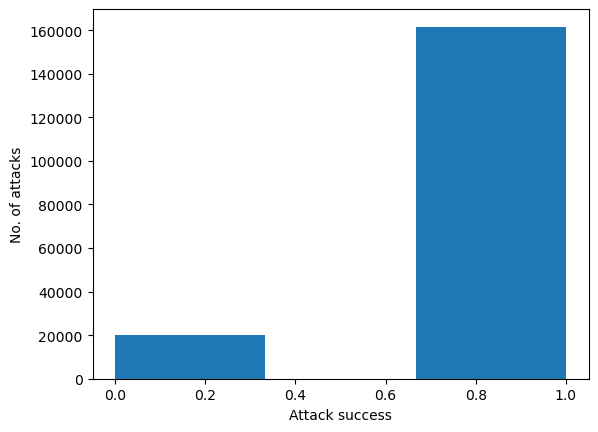

In [38]:
plt.hist(df2['success'],bins =3)
plt.xlabel("Attack success")
plt.ylabel("No. of attacks")

In [39]:
df['success'].value_counts()[1]/df2.shape[0]
# Dataset is highly skewed for success = 1, about 89%

np.float64(0.8895982739926579)

<Axes: title={'center': 'Terror Activities by Year'}, xlabel='Year', ylabel='No. of Attacks'>

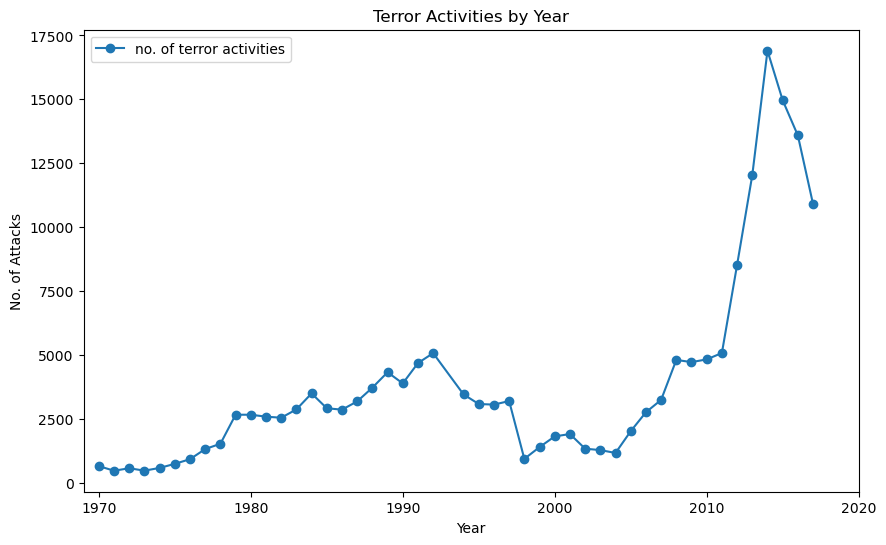

In [117]:
#How has the number of terrorist activities changed over the years? 

incidents_by_year = df2.groupby('iyear')['success'].count().reset_index()
incidents_by_year.columns = ['year', 'no. of terror activities']
incidents_by_year.plot(kind='line', 
                       x='year', 
                       y='no. of terror activities', 
                       marker='o', # Use 'o' for dots
                       title='Terror Activities by Year', 
                       xlabel='Year', 
                       ylabel='No. of Attacks', 
                       xlim=(1969, 2020),
                       figsize=(10, 6))

<Axes: title={'center': 'Global avg no. of attacks per year'}, xlabel='Year', ylabel='No. of attacks'>

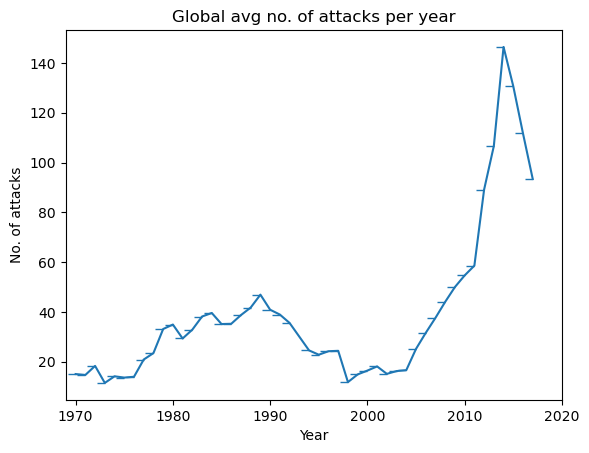

In [116]:
# Are there certain regions where this trend is different from the global averages?

# 1. Count attacks for every country-year combination
country_year_counts = df.groupby(['iyear', 'natlty1_txt']).size().reset_index(name='attack_count')

# 2. Find the mean of those counts for each year
# This tells you: "In 2017, the average country experienced X attacks"
avg_attacks_per_country_by_year = country_year_counts.groupby('iyear')['attack_count'].mean()

avg_attacks_per_country_by_year.plot(kind= 'line', marker=0, title = 'Global avg no. of attacks per year',xlabel = 'Year',ylabel = 'No. of attacks',xlim = (1969,2020)) 

In [112]:
attacks_on_nation = df[df['success'] == 1].groupby('natlty1_txt')['success'].count()
print(attacks_on_nation.sort_values(ascending = False))

natlty1_txt
Iraq                           21358
Pakistan                       12169
India                          10408
Afghanistan                     9801
Colombia                        7358
                               ...  
Saba (Netherlands Antilles)        1
St. Lucia                          1
Seychelles                         1
Tuvalu                             1
Western Sahara                     1
Name: success, Length: 214, dtype: int64


<Axes: title={'center': 'Terror attacks on Iraq'}, xlabel='Year', ylabel='No. of successful attacks'>

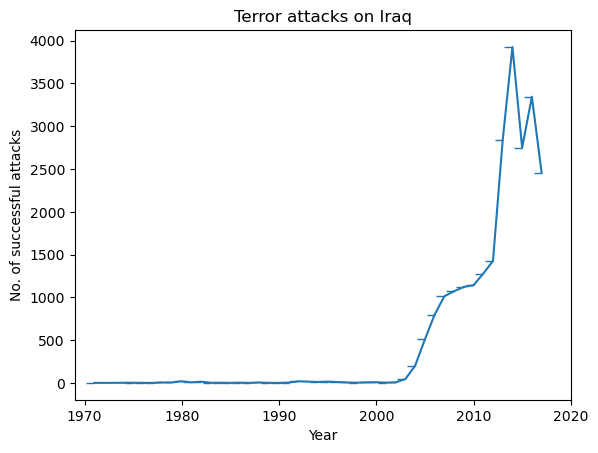

In [115]:
iraq_attacks = df[df['natlty1_txt'] == 'Iraq'].groupby('iyear').size()
iraq_attacks.columns = ['Year','Attacks']
iraq_attacks.plot(kind = 'line', marker = 0, title = 'Terror attacks on Iraq', xlabel='Year', ylabel = 'No. of successful attacks',xlim = (1969,2020))

<Axes: title={'center': 'Terror attacks on India'}, xlabel='Year', ylabel='No. of attacks'>

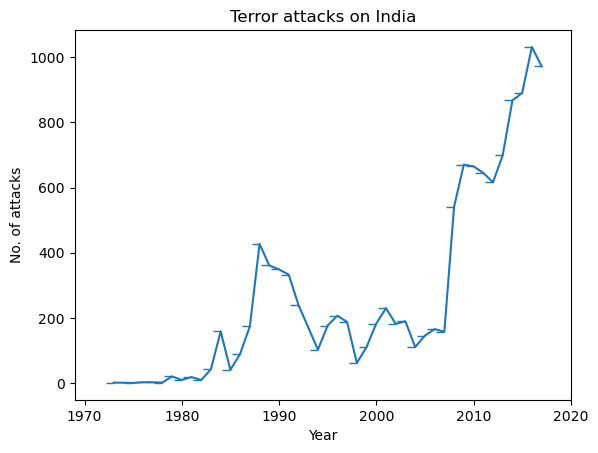

In [114]:
india_attacks = df[df['natlty1_txt'] == 'India'].groupby('iyear').size()
india_attacks.plot(kind='line', marker = 0, title = 'Terror attacks on India', xlabel = 'Year',ylabel = 'No. of attacks',xlim = (1969,2020))

In [55]:
df2.dtypes

success               int64
iyear                 int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1_txt        object
targsubtype1_txt     object
target1              object
natlty1_txt          object
gname                object
gsubname             object
nperps              float64
weaptype1_txt        object
weapsubtype1_txt     object
nkill               float64
nkillus             float64
dtype: object

In [63]:
incidents_and_casualties = df.groupby('iyear').agg(
    incidents = ('iyear','count'),
    casualties = ('nkill','sum')
).reset_index()
incidents_and_casualties.columns = ['year','incidents','casualties']
print(incidents_and_casualties)

    year  incidents  casualties
0   1970        651       174.0
1   1971        471       173.0
2   1972        568       566.0
3   1973        473       370.0
4   1974        581       539.0
5   1975        740       617.0
6   1976        923       674.0
7   1977       1319       456.0
8   1978       1526      1459.0
9   1979       2662      2100.0
10  1980       2662      4400.0
11  1981       2586      4851.0
12  1982       2544      5136.0
13  1983       2870      9444.0
14  1984       3495     10450.0
15  1985       2915      7094.0
16  1986       2860      4976.0
17  1987       3183      6482.0
18  1988       3721      7208.0
19  1989       4324      8152.0
20  1990       3887      7148.0
21  1991       4683      8429.0
22  1992       5071      9742.0
23  1994       3456      7690.0
24  1995       3081      6103.0
25  1996       3058      6966.0
26  1997       3197     10924.0
27  1998        934      4688.0
28  1999       1395      3393.0
29  2000       1814      4403.0
30  2001

Text(0, 0.5, 'No. of casualties')

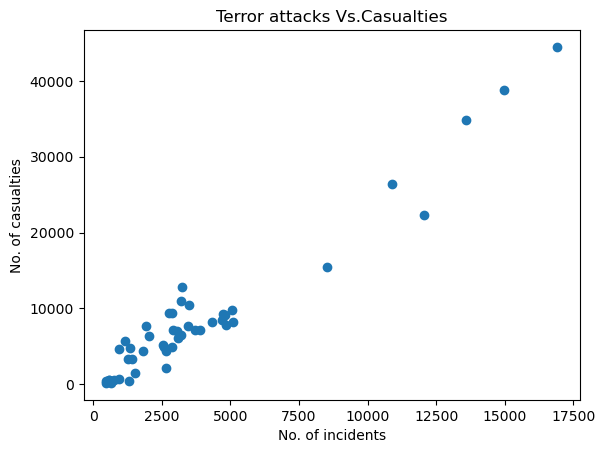

In [68]:
plt.scatter(incidents_and_casualties["incidents"],incidents_and_casualties['casualties'])
plt.title("Terror attacks Vs.Casualties")
plt.xlabel("No. of incidents")
plt.ylabel("No. of casualties")

{'whiskers': [<matplotlib.lines.Line2D at 0x1e5a99ae710>,
 'caps': [<matplotlib.lines.Line2D at 0x1e5a99ae990>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e5a99ae5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e5a99aec10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e5a99aed50>],
 'means': []}

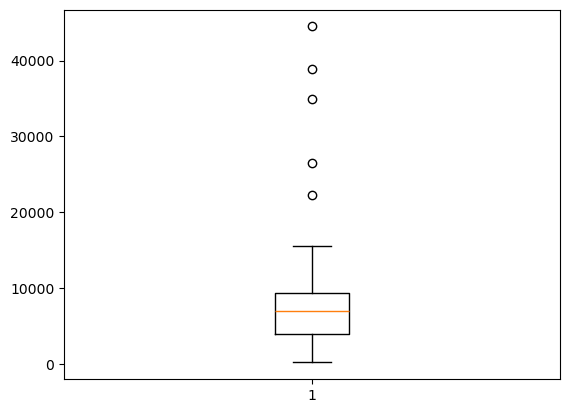

In [69]:
plt.boxplot(incidents_and_casualties["casualties"])

In [70]:
q1 = incidents_and_casualties['casualties'].quantile(0.25)
q3 = incidents_and_casualties['casualties'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [77]:
outliers = incidents_and_casualties[(incidents_and_casualties['casualties'] < lower_bound) | (incidents_and_casualties['casualties'] > upper_bound)]
outliers.index

Index([42, 43, 44, 45, 46], dtype='int64')

In [83]:
incidents_and_casualties.iloc[42:46]

,year,incidents,casualties
42,2013,12036,22273.0
43,2014,16903,44490.0
44,2015,14965,38853.0
45,2016,13587,34871.0


In [84]:
df2.columns

Index(['success', 'iyear', 'suicide', 'attacktype1', 'attacktype1_txt',
       'targtype1_txt', 'targsubtype1_txt', 'target1', 'natlty1_txt', 'gname',
       'gsubname', 'nperps', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill',
       'nkillus'],
      dtype='object')

In [86]:
df2['attacktype1_txt'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [92]:
attack_methods = df2.groupby('attacktype1_txt').size().reset_index()
attack_methods.columns = ['Attack_methods','No. of incidents']
print(attack_methods)

                        Attack_methods  No. of incidents
0                        Armed Assault             42669
1                        Assassination             19312
2                    Bombing/Explosion             88255
3       Facility/Infrastructure Attack             10356
4                            Hijacking               659
5  Hostage Taking (Barricade Incident)               991
6          Hostage Taking (Kidnapping)             11158
7                      Unarmed Assault              1015
8                              Unknown              7276


In [97]:
#What are the most common methods of attacks? Does it differ in various regions or in time?

year_pivot = df2.pivot_table(index = 'iyear',
                       columns = 'attacktype1_txt',
                       values = 'success',
                       aggfunc = 'count',
                       fill_value = 0)
print("--- Incidents by Year ---")
print(year_pivot.tail())

--- Incidents by Year ---
attacktype1_txt  Armed Assault  Assassination  Bombing/Explosion  \
iyear                                                              
2013                      2962            853               6685   
2014                      4071            920               8799   
2015                      3368            927               7662   
2016                      2733            821               7108   
2017                      2365            816               5024   

attacktype1_txt  Facility/Infrastructure Attack  Hijacking  \
iyear                                                        
2013                                        564         17   
2014                                        783         49   
2015                                        705         38   
2016                                        696         43   
2017                                        751         58   

attacktype1_txt  Hostage Taking (Barricade Incident)  \
iyear 

In [98]:
country_pivot = df2.pivot_table(index = 'natlty1_txt',
                                columns = 'attacktype1_txt',
                                values = 'success',
                                aggfunc = 'count',
                                fill_value =0)
print("--- Incidents by Country ---")
print(country_pivot)

--- Incidents by Country ---
attacktype1_txt      Armed Assault  Assassination  Bombing/Explosion  \
natlty1_txt                                                            
Afghanistan                   2651            976               4864   
Albania                         18             16                 54   
Algeria                        891            392               1083   
Angola                         104              7                249   
Antigua and Barbuda              0              0                  0   
...                            ...            ...                ...   
Yemen                          641            427               1312   
Yugoslavia                      27             19                 68   
Zaire                           10              3                 11   
Zambia                          18              3                 27   
Zimbabwe                        24             22                 28   

attacktype1_txt      Facility/Infr

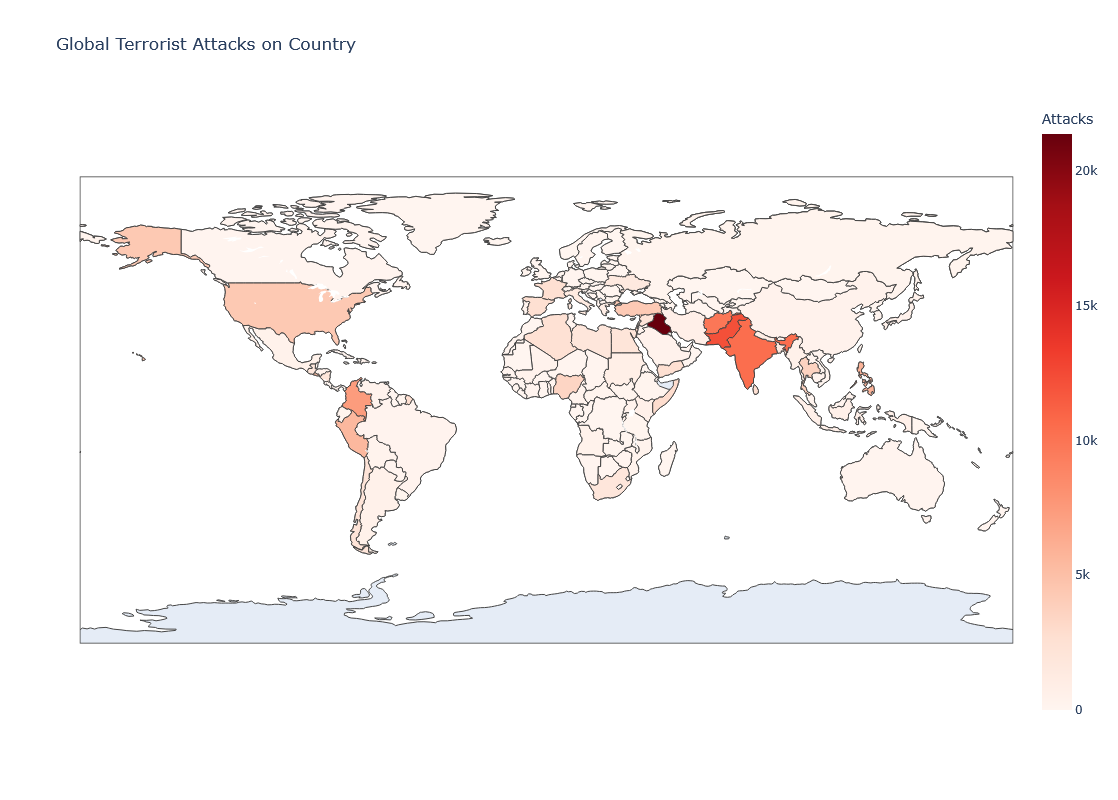

In [99]:
# Plot the locations of attacks on a map to visualize their regional spread

import plotly.express as px

attacks_df = attacks_on_nation.reset_index()
attacks_df.columns = ['Country', 'Attacks']

fig = px.choropleth(attacks_df, 
                    locations="Country", 
                    locationmode="country names",
                    color="Attacks", 
                    hover_name="Country",
                    title="Global Terrorist Attacks on Country",
                    color_continuous_scale=px.colors.sequential.Reds,
                    width=1200,
                    height=800)

fig.show()